In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ks = pd.read_csv("~/Desktop/dataforgood/data/ks-projects-201801.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
ks.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
ks.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [5]:
ks.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [6]:
### Fix code to change N,0's to NO

## replace NA’s in country with None
replace = ks[~ks.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
ks.loc[:,'country'] = ks.country.replace(to_replace=replace, value='None')

## Which regions have the best success with kickstarters?
##### i.e. total number of successes in country / total number of projects in country

In [7]:
# count of differnet states per country
### just because they started doesn't mean they were successful
states_of_countries = pd.DataFrame(ks.groupby(["country","state"]).state.count())
states_of_countries

state
country state             
AT      canceled        91
        failed         378
        live            15
        successful     107
        suspended        6
AU      canceled      1065
        failed        4606
        live            70
        successful    2010
        suspended       88
BE      canceled        74
        failed         371
        live            12
        successful     152
        suspended        8
CA      canceled      2138
        failed        8236
        live           132
        successful    4134
        suspended      116
CH      canceled        84
        failed         465
        live            14
        successful     187
        suspended       11
DE      canceled       621
        failed        2499
        live            75
        successful     937
        suspended       39
...                    ...
NO      failed         420
        live             8
        successful     162
        suspended        6
NZ      canceled       151
        failed         826
        live            11
        successful     448
        suspended       11
None    canceled        22
        failed         105
        live             1
        successful     105
        suspended        2
        undefined     3562
SE      canceled       209
        failed        1000
        live            20
        successful     509
        suspended       19
SG      canceled        67
        failed         276
        live            28
        successful     178
        suspended        6
US      canceled     28311
        failed      152061
        live          1740
        successful  109299
        suspended     1216

[114 rows x 1 columns]

In [8]:
#total number of states per country 
total_states_per_country = states_of_countries.groupby(["country"]).state.sum()
total_states_per_country

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
NL        2868
NO         708
NZ        1447
None      3797
SE        1757
SG         555
US      292627
Name: state, dtype: int64

In [9]:
#percentages of each state of kickstaters per country
rate_eachstate_country = pd.DataFrame(states_of_countries.state / total_states_per_country)
rate_eachstate_country = rate_eachstate_country.unstack()
rate_eachstate_country.state.successful#.index = country_labels#.orderby#(country_labels)

country
AT      0.179229
AU      0.256410
BE      0.246353
CA      0.280157
CH      0.245729
DE      0.224646
DK      0.323450
ES      0.216169
FR      0.308949
GB      0.358369
HK      0.349515
IE      0.255240
IT      0.152536
JP      0.175000
LU      0.306452
MX      0.226027
NL      0.215132
NO      0.228814
NZ      0.309606
None    0.027653
SE      0.289698
SG      0.320721
US      0.373510
Name: successful, dtype: float64

In [10]:
rate_eachstate_country.state.successful

country
AT      0.179229
AU      0.256410
BE      0.246353
CA      0.280157
CH      0.245729
DE      0.224646
DK      0.323450
ES      0.216169
FR      0.308949
GB      0.358369
HK      0.349515
IE      0.255240
IT      0.152536
JP      0.175000
LU      0.306452
MX      0.226027
NL      0.215132
NO      0.228814
NZ      0.309606
None    0.027653
SE      0.289698
SG      0.320721
US      0.373510
Name: successful, dtype: float64

In [11]:
rate_eachstate_country.state.successful

country
AT      0.179229
AU      0.256410
BE      0.246353
CA      0.280157
CH      0.245729
DE      0.224646
DK      0.323450
ES      0.216169
FR      0.308949
GB      0.358369
HK      0.349515
IE      0.255240
IT      0.152536
JP      0.175000
LU      0.306452
MX      0.226027
NL      0.215132
NO      0.228814
NZ      0.309606
None    0.027653
SE      0.289698
SG      0.320721
US      0.373510
Name: successful, dtype: float64

In [12]:
rate_eachstate_country.state.successful.sort_values(ascending=False)
### We find that the US has the best success with Kickstarter with about 37% campaigns succeeding.
### Closely following is the United Kingdom with 35.8% and Hong Kong with 34.95%.

country
US      0.373510
GB      0.358369
HK      0.349515
DK      0.323450
SG      0.320721
NZ      0.309606
FR      0.308949
LU      0.306452
SE      0.289698
CA      0.280157
AU      0.256410
IE      0.255240
BE      0.246353
CH      0.245729
NO      0.228814
MX      0.226027
DE      0.224646
ES      0.216169
NL      0.215132
AT      0.179229
JP      0.175000
IT      0.152536
None    0.027653
Name: successful, dtype: float64

## Mean Pledge Amount per Country
##### use usd_pledged_real

In [13]:
# looking at the average pledge per country
ks.groupby(["country"]).usd_pledged_real.mean().sort_values(ascending=False)
# Interestingly, Switzerland (CH) has the highest average real pledge amount 
# Mexico has the lowest average real pledge amount

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
None     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

## Correlation between goal and success/failure
##### use usd_goal_real

In [14]:
# average amount that was raised for each state per country 
ks.groupby(['country','state']).usd_goal_real.mean().unstack()

state,canceled,failed,live,successful,suspended,undefined
country,,,,,,
AT,54568.585824,49083.428757,56955.877333,17563.468785,67428.121667,NaN
AU,78163.159315,76285.384952,20387.479143,7970.463592,39187.237614,NaN
BE,52080.741216,43869.946173,30723.386667,15034.365789,30520.991250,NaN
CA,40578.561389,63490.250461,18271.726818,7612.146251,101274.455259,NaN
CH,65668.541548,421525.553312,52903.897857,21107.786578,21094.869091,NaN
DE,67937.995266,101485.045966,48792.265867,13614.734194,37877.444103,NaN
DK,124281.089045,29230.412138,9687.968125,9187.161944,5936.674286,NaN
ES,54980.288248,69068.376343,17420.810385,9758.237134,19034.030500,NaN
FR,37008.437450,131470.710974,19637.620385,13214.852555,13087.284286,NaN


In [15]:
# average goal for a kickstarter per country
country_goal_means = ks.groupby(['country']).usd_goal_real.mean().sort_values(ascending=False)
country_goal_means

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
None      5097.306455
Name: usd_goal_real, dtype: float64

In [16]:
# trying to get the average real goal, for failed states, for each country 
failures = ks[ks['state'] == 'failed'].groupby('country')['usd_goal_real'].mean()
failures 

country
AT       49083.428757
AU       76285.384952
BE       43869.946173
CA       63490.250461
CH      421525.553312
DE      101485.045966
DK       29230.412138
ES       69068.376343
FR      131470.710974
GB       60895.593468
HK       33562.054291
IE       58449.820819
IT       99104.481746
JP       16601.266250
LU       43371.481316
MX       18443.720414
NL       89953.460708
NO       58735.074214
NZ       33202.509189
None     35458.673333
SE       54043.301830
SG       18408.315725
US       60664.242108
Name: usd_goal_real, dtype: float64

In [17]:
# trying to get the average real goal, for successful states, for each country 
success = ks[ks['state'] == 'successful'].groupby('country')['usd_goal_real'].mean()
success 

country
AT      17563.468785
AU       7970.463592
BE      15034.365789
CA       7612.146251
CH      21107.786578
DE      13614.734194
DK       9187.161944
ES       9758.237134
FR      13214.852555
GB       8171.653679
HK      12890.763194
IE      10860.509275
IT      10029.062620
JP       4481.211429
LU      14965.576316
MX       3584.164470
NL      12824.328428
NO       6747.101667
NZ       7234.105000
None     5901.758857
SE       8779.036189
SG       9426.487753
US       9695.670955
Name: usd_goal_real, dtype: float64

In [18]:
country_labels = [co for co in country_goal_means.index]
country_labels

['CH',
 'NL',
 'FR',
 'IT',
 'DE',
 'NO',
 'AU',
 'ES',
 'IE',
 'AT',
 'CA',
 'US',
 'GB',
 'SE',
 'BE',
 'DK',
 'LU',
 'NZ',
 'HK',
 'JP',
 'SG',
 'MX',
 'None']

In [19]:
[x for x in enumerate(country_labels)]

[(0, 'CH'),
 (1, 'NL'),
 (2, 'FR'),
 (3, 'IT'),
 (4, 'DE'),
 (5, 'NO'),
 (6, 'AU'),
 (7, 'ES'),
 (8, 'IE'),
 (9, 'AT'),
 (10, 'CA'),
 (11, 'US'),
 (12, 'GB'),
 (13, 'SE'),
 (14, 'BE'),
 (15, 'DK'),
 (16, 'LU'),
 (17, 'NZ'),
 (18, 'HK'),
 (19, 'JP'),
 (20, 'SG'),
 (21, 'MX'),
 (22, 'None')]

In [20]:
labels = ['{}'.format(co) for co in country_labels]

In [21]:
new = rate_eachstate_country.state.successful
new.index = country_labels#.orderby#(country_labels)

In [22]:
new

CH      0.179229
NL      0.256410
FR      0.246353
IT      0.280157
DE      0.245729
NO      0.224646
AU      0.323450
ES      0.216169
IE      0.308949
AT      0.358369
CA      0.349515
US      0.255240
GB      0.152536
SE      0.175000
BE      0.306452
DK      0.226027
LU      0.215132
NZ      0.228814
HK      0.309606
JP      0.027653
SG      0.289698
MX      0.320721
None    0.373510
Name: successful, dtype: float64

In [23]:
new_y_axis_successrate = rate_eachstate_country.state.successful.reindex(country_labels)
new_y_axis_successrate

country
CH      0.245729
NL      0.215132
FR      0.308949
IT      0.152536
DE      0.224646
NO      0.228814
AU      0.256410
ES      0.216169
IE      0.255240
AT      0.179229
CA      0.280157
US      0.373510
GB      0.358369
SE      0.289698
BE      0.246353
DK      0.323450
LU      0.306452
NZ      0.309606
HK      0.349515
JP      0.175000
SG      0.320721
MX      0.226027
None    0.027653
Name: successful, dtype: float64

In [24]:
np.corrcoef(country_goal_means, failures)
# little to no correlation between the average goals per country and failures

array([[1.        , 0.10380482],
       [0.10380482, 1.        ]])

In [25]:
correlation = np.corrcoef(country_goal_means, success)
correlation
# As we can see, there is some correlation between average goals per country and its success.
### Possibly looking into regression to see if this is significant

array([[1.        , 0.46704379],
       [0.46704379, 1.        ]])

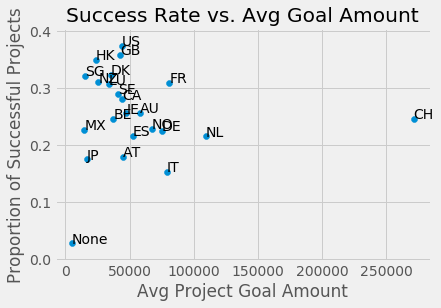

In [28]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()



ax.scatter(country_goal_means,new_y_axis_successrate)
plt.xlabel('Avg Project Goal Amount')
plt.ylabel('Proportion of Successful Projects')
plt.title('Success Rate vs. Avg Goal Amount')
for i,co in enumerate(country_labels):
    ax.annotate(co, (country_goal_means[i], new_y_axis_successrate[i]))



# There is no relationship between the goal amount of a country's projects and the overall sucess rate for a country's projects. Switzlerland's average goal amount is an outlier; it's projects have a notebly high average goal amount, however Switzerland does not have a particularly high success rate nor does it have a particularly low success rate. 


In [29]:
np.corrcoef(country_goal_means,new_y_axis_successrate)

array([[ 1.        , -0.02657165],
       [-0.02657165,  1.        ]])

# Technically, there is a slight negative correaltion between a country's goal amount and its success rate. As its goal amount increasss, its success rate drops

In [30]:
#trying to do a linear regression?

## Currency vs. region
##### use usd_pledged_real, usd_goal_real VALUES

In [31]:
# total pledged amount and total goal amount per country
ks.groupby(["country"])["usd_pledged_real", "usd_goal_real"].sum()

,usd_pledged_real,usd_goal_real
country,,
AT,9.665789e+06,2.665748e+07
AU,4.673713e+07,4.555105e+08
BE,4.181558e+06,2.302780e+07
CA,9.179336e+07,6.552910e+08
CH,1.305512e+07,2.064454e+08
DE,3.977627e+07,3.136943e+08
DK,7.583262e+06,3.960204e+07
ES,1.294765e+07,1.196695e+08
FR,3.435751e+07,2.381982e+08


In [32]:
# average pledged amount and average goal amount per country
ks.groupby(["country"])["usd_goal_real","usd_pledged_real"].mean()

,usd_goal_real,usd_pledged_real
country,,
AT,44652.387655,16190.600603
AU,58108.238300,5962.128806
BE,37322.199433,6777.240827
CA,44408.442966,6220.748131
CH,271281.726675,17155.217096
DE,75208.408327,9536.387924
DK,35581.350836,6813.352713
ES,52578.874587,5688.775738
FR,81047.372872,11690.203409


In [33]:
# average pledged amount by country greatest to least
ks.groupby(["country"])["usd_pledged_real"].mean().sort_values(ascending=False)

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
None     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

In [34]:
# average goal amount by country greatest to least
ks.groupby(["country"])["usd_goal_real"].mean().sort_values(ascending=False)

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
None      5097.306455
Name: usd_goal_real, dtype: float64

In [35]:
#total pledge amount by country
total_country_pledged = ks.groupby(["country"])["usd_pledged_real"].sum()

#average pledge amount for kickstarter per country
rate_pledge_country = total_country_pledged / total_states_per_country
rate_pledge_country.sort_values(ascending=False)

# Example: US
# Average pledge amount in US is $9,670.19 

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
None     2949.850598
JP       2897.210250
MX       1387.002568
dtype: float64

In [36]:
#total goal amount by country
total_country_goal = ks.groupby(["country"])["usd_goal_real"].sum()

#average goal of kickstarter per country
rate_pledge_country = total_country_goal / total_states_per_country
rate_pledge_country.sort_values(ascending=False)

# Example: US
# Average goal of a kickstarter in the US is $44,034.97

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
None      5097.306455
dtype: float64